# Import databases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## SQLite

In [11]:
# !pip install ipython-sql
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [21]:
%sql sqlite:////Users/alexandertin/Desktop/Citibike/data/sqlite3/citi_bike_year.db

In [14]:
df_total = pd.DataFrame(total)

In [21]:
subsample5 = pd.read_csv('/Users/alexandertin/Desktop/Citibike/data/sqlite3/schwinning_5_subsample.csv')

In [3]:
subsample5.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'counter', 'year', 'age'],
      dtype='object')

In [4]:
subsample5.shape

(4955449, 18)

In [24]:
subsample5.starttime = pd.to_datetime(subsample5.starttime)
subsample5.stoptime = pd.to_datetime(subsample5.stoptime)

In [7]:
subsample5.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                         object
gender                              int64
counter                             int64
year                                int64
age                                 int64
dtype: object

In [9]:
subsample5.starttime

0         2013-07-01 00:02:16.000
1         2013-07-01 00:06:57.000
2         2013-07-01 00:07:23.000
3         2013-07-01 00:08:43.000
4         2013-07-01 00:25:51.000
                    ...          
4955444   2020-05-31 20:12:55.096
4955445   2020-05-31 20:15:14.264
4955446   2020-05-31 20:32:33.753
4955447   2020-05-31 20:35:23.641
4955448   2020-05-31 21:59:00.139
Name: starttime, Length: 4955449, dtype: datetime64[ns]

In [67]:
sub5 = subsample5.copy()

In [68]:
#Separate date columns
sub5['year'] = sub5['starttime'].dt.year
sub5['month'] = sub5['starttime'].dt.month
sub5['day'] = sub5['starttime'].dt.day
sub5['time'] = sub5['starttime'].dt.time


In [65]:
sub5.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'counter', 'year', 'age', 'month', 'day',
       'time'],
      dtype='object')

## Rider Volume by Time

In [79]:
rider_volume.dtypes

year        int64
month       int64
day         int64
time       object
counter     int64
hour        int64
dtype: object

In [78]:
rider_volume = sub5[['year','month','day','time','counter']]

#For visualization, create column to aggregate by hour
rider_volume['hour'] = rider_volume.time.astype(str).str[:2]
rider_volume['hour'] = rider_volume['hour'].astype(int)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [95]:
#
rider_volume_graph = rider_volume.groupby(['year','month','day','hour']).sum().reset_index()

In [105]:
rider_volume_graph

,year,month,day,hour,counter
0,2013,6,1,0,13
1,2013,6,1,1,7
2,2013,6,1,2,5
3,2013,6,1,3,2
4,2013,6,1,6,3
...,...,...,...,...,...
60050,2020,5,31,19,268
60051,2020,5,31,20,180
60052,2020,5,31,21,92
60053,2020,5,31,22,83


In [108]:
rider_volume_graph.year.value_counts()

2019    8709
2018    8668
2016    8569
2017    8546
2015    8493
2014    8436
2013    5027
2020    3607
Name: year, dtype: int64

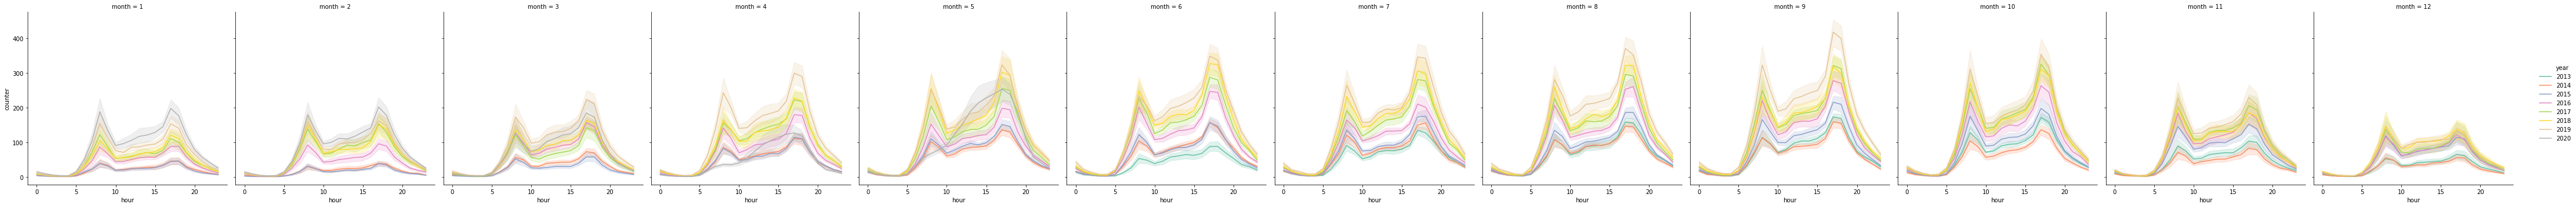

In [115]:
sns.relplot(x='hour', y='counter', hue ='year', col ='month', data=rider_volume_graph, kind='line', legend='full', palette='Set2')

In [1]:
sns.relplot(x='hour', y='counter', hue ='month', col ='year', data=rider_volume_graph, kind='line', legend='full', palette='Set2')

NameError: name 'sns' is not defined

In [45]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons


In [ ]:
rider_volume.groupby('year','month')